# **Percepton classifier**

This homework is aimed at implementing the Perceptron classifier.

The program that implements the Perceptron in order to classify the following set of points:
 - (6, 9), (8, 14), (9, 7), (9, 11), (11, 8), (14,2), (16, 5), (17, 10), and (19, 3).

Figure 1 illustrates how such points must be classified.

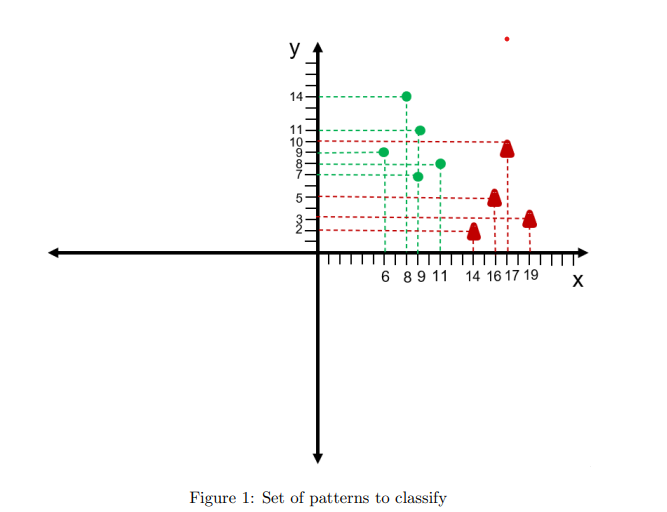

In [142]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

In [143]:
w0 = 0
w1 = -0.5
w2 = 2

alpha = 0.2
initial_weight = (w0, w1, w2)

In [144]:
green_dots = [(6,9), (8, 14), (9, 7), (9, 11), (11, 8)]
red_triangles = [(14, 2), (16, 5), (17, 10), (19, 3)]

dataset = green_dots + red_triangles

In [145]:
def eval_function(weight, x):
    return (-weight[1]/weight[2] * x) - (weight[0]/weight[2])

In [146]:
def perceptron(group, x, y, weight):
    vector = (group, x, y)
    sigma = int(sum([i*j for (i, j) in zip(vector, weight)]))
    return 1 if sigma > 1 else 0

In [147]:
def classify(weight):
    weights_changed = True
    weight_history = []
    while weights_changed:
        weights_changed = False
        for coor in dataset:
            group = 1 if coor in green_dots else 0
            x, y = coor
    
            new_weight = (weight[0] + alpha * float((group - perceptron(1, x, y, weight))) * 1,
                        weight[1] + alpha * float((group - perceptron(1, x, y, weight))) * x,
                        weight[2] + alpha * float((group - perceptron(1, x, y, weight))) * y)
    
            if new_weight != weight:
                weight = new_weight
                weights_changed = True
                w0, w1, w2 = new_weight
                
            weight_history.append(new_weight)
        
    return weight_history

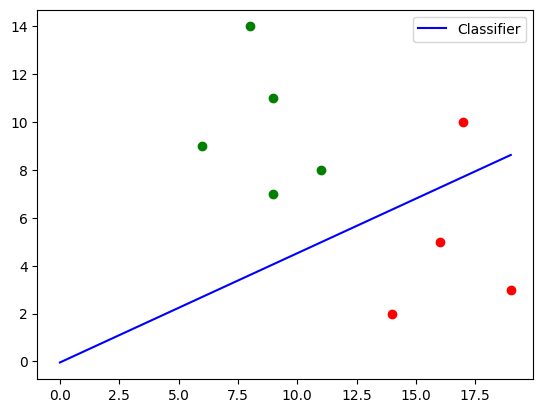

In [ ]:
weights = classify(initial_weight)

fig, ax = plt.subplots()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(alpha=1.0)

for w in weights:
    ax.clear()
    ax.plot([x for x in range(20)],[eval_function(w, y) for y in range(20)], label='Classifier', color='blue')
    ax.scatter([coor[0] for coor in green_dots], [coor[1] for coor in green_dots], color='green')
    ax.scatter([coor[0] for coor in red_triangles], [coor[1] for coor in red_triangles], color='red')
    ax.legend()
    display(fig)
    clear_output(wait=True)
    time.sleep(0.3)

plt.ioff()
plt.show()